### Training a Feedforward Network

In [10]:
# Steps:
# MNIST
# DataLoader, Transdormation
# Multilayer NN, activation function
# Loss Optimizer 
# Training Loop (Batch training)
# Model Evaluation
# GPU Support 

In [1]:
import torch 
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 

torch.Size([100, 1, 28, 28]) torch.Size([100])


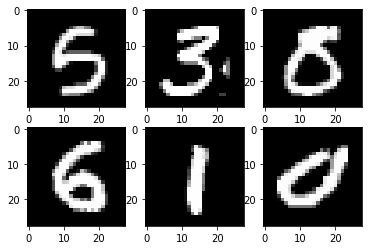

In [5]:
# device config 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters 

input_size = 784 # 28 x 28 
hidden_size = 100 
num_classes = 10 
num_epoch = 2 
batch_size = 100 
learning_rate = 0.001 

#MNIST 
train_dataset = torchvision.datasets.MNIST(root = './data', train= True, transform= transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root = './data', train= False, transform= transforms.ToTensor(),download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)

samples, labels = examples.next()

print(samples.shape, labels.shape)
# 100 samples, 1 channle gray, images size 28 x 28 , labeles = 100 


for i in range(6):
    plt.subplot(2,3, i + 1 )
    plt.imshow(samples[i][0], cmap= 'gray')
#plt.show()

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu= nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out 
# create the model 
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer 

criterion = nn.CrossEntropyLoss()

# optimizer 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# traininh loop 
# define the number of total steps 

num_total_steps = len(train_loader)

for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100 , 1 , 28 x 28 
        # 100, 784
        # first reshape the tensor 
        images = images.reshape(-1, 28*28).to(device)
        labeles = labels.to(device)
        # forward pass 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{num_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.5489
Epoch [1/2], Step [200/600], Loss: 0.1709
Epoch [1/2], Step [300/600], Loss: 0.2486
Epoch [1/2], Step [400/600], Loss: 0.3552
Epoch [1/2], Step [500/600], Loss: 0.4016
Epoch [1/2], Step [600/600], Loss: 0.1264
Epoch [2/2], Step [100/600], Loss: 0.2166
Epoch [2/2], Step [200/600], Loss: 0.1392
Epoch [2/2], Step [300/600], Loss: 0.2894
Epoch [2/2], Step [400/600], Loss: 0.1682
Epoch [2/2], Step [500/600], Loss: 0.0813
Epoch [2/2], Step [600/600], Loss: 0.2154


In [9]:
# Evaluation 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.35 %
